In [1]:
from datascience import*
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


In [2]:
def triple(x):
    return 3 * x

In [3]:
triple(4)

12

In [4]:
triple('ha')

'hahaha'

In [5]:
array = (2, 3, 4, 5)

In [6]:
triple(array)

(2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5)

In [7]:
make_array(2, 3, 4, 5)

array([2, 3, 4, 5], dtype=int64)

In [8]:
triple(make_array(2, 3, 4, 5))

array([ 6,  9, 12, 15], dtype=int64)

In [9]:
#This gives an error
triple(make_array)

TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [ ]:
#Rounded off
def percent_of_total(s):
    return np.round(s/sum(s) * 100, 2)

In [ ]:
first_four = make_array(1,2,3,4)
first_four

In [ ]:
percent_of_total(first_four)

In [ ]:
def hypotenuse(x,y):
    hypot_squared = (x**2 + y**2)
    hypot = hypot_squared ** 0.5
    return hypot

In [ ]:
hypotenuse(0.1, 46)

In [10]:
#Apply operation

In [11]:
#L10


In [15]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [44]:
#Just another way of looking
families.scatter

<bound method Table.scatter of family | father | mother | midparentHeight | children | childNum | sex    | childHeight
1      | 78.5   | 67     | 75.43           | 4        | 1        | male   | 73.2
1      | 78.5   | 67     | 75.43           | 4        | 2        | female | 69.2
1      | 78.5   | 67     | 75.43           | 4        | 3        | female | 69
1      | 78.5   | 67     | 75.43           | 4        | 4        | female | 69
2      | 75.5   | 66.5   | 73.66           | 4        | 1        | male   | 73.5
2      | 75.5   | 66.5   | 73.66           | 4        | 2        | male   | 72.5
2      | 75.5   | 66.5   | 73.66           | 4        | 3        | female | 65.5
2      | 75.5   | 66.5   | 73.66           | 4        | 4        | female | 65.5
3      | 75     | 64     | 72.06           | 2        | 1        | male   | 71
3      | 75     | 64     | 72.06           | 2        | 2        | female | 68
... (924 rows omitted)>

In [16]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [21]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('childHeight'),
    'Gender', families.column('sex'))
heights

Parent Average,Child,Gender
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


In [22]:
#What would be a good visualization to explore the relation between the child and parents height

In [23]:
#TWO NUMERICAL VARIABLES

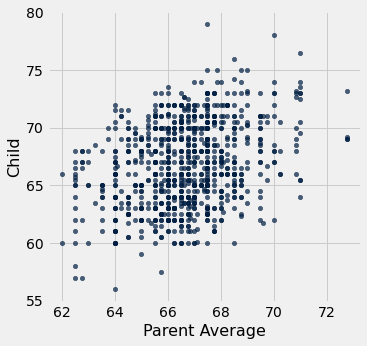

In [24]:
heights.scatter('Parent Average', 'Child')

In [25]:
#How would you predict the height for a new baby

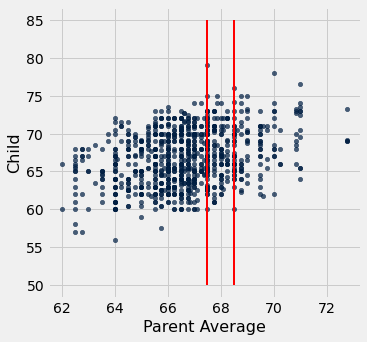

In [26]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50,85], color = 'red', lw=2)
plots.plot([68.5, 68.5], [50,85], color = 'red', lw=2)

In [29]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.62

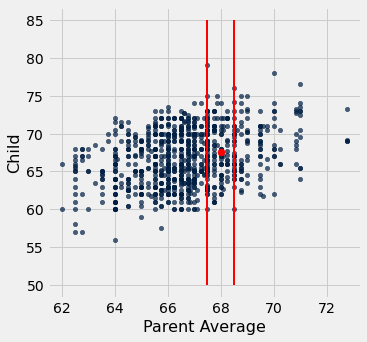

In [30]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50,85], color = 'red', lw=2)
plots.plot([68.5, 68.5], [50,85], color = 'red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [31]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h-1/2, h+1/2))
    nearby_mean = np.average(nearby.column('Child'))
    return nearby_mean

In [35]:
predict(70)

68.56190476190476

In [36]:
predict(73)

70.1

In [ ]:
#apply (function is applied to every value of the column)

In [38]:
predicted_height = heights.apply(predict, 'Parent Average')

In [41]:
heights = heights.with_column('Prediction', predicted_height)
heights

Parent Average,Child,Gender,Prediction
72.75,73.2,male,70.1
72.75,69.2,female,70.1
72.75,69,female,70.1
72.75,69,female,70.1
71,73.5,male,70.4158
71,72.5,male,70.4158
71,65.5,female,70.4158
71,65.5,female,70.4158
69.5,71,male,68.5025
69.5,68,female,68.5025


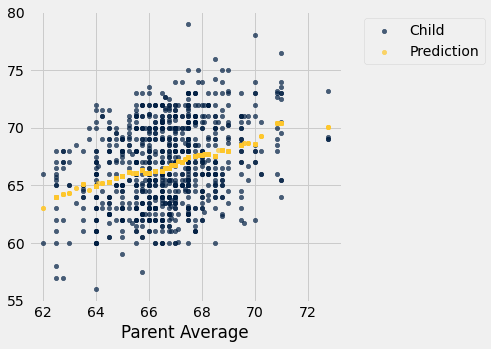

In [43]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

In [45]:
def difference(x,y):
    return x-y

In [49]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.51769547e+00,
       -2.51769547e+00, -1.51769547e+00, -1.76954733e-02,  3.98230453e+00,
        3.98230453e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.21500000e+00,  1.28500000e+00,  3.28500000e+00,  3.28500000e+00,
        3.16052632e+00, -6.38000000e+00, -2.38000000e+00, -3.80000000e-01,
        6.20000000e-01,  6.20000000e-01,  1.62000000e+00,  4.12000000e+00,
        4.62000000e+00,  2.46184211e+00, -2.43809524e+00,  6.56190476e+00,
        5.61904762e-01,  1.56190476e+00, -2.33947368e+00, -1.83947368e+00,
        1.96052632e+00, -4.01194030e+00, -2.51194030e+00, -2.21194030e+00,
       -2.21194030e+00, -

In [53]:
heights = heights.with_columns('errors', pred_errs)
heights

Parent Average,Child,Gender,Prediction,errors
72.75,73.2,male,70.1,-3.1
72.75,69.2,female,70.1,0.9
72.75,69,female,70.1,1.1
72.75,69,female,70.1,1.1
71,73.5,male,70.4158,-3.08421
71,72.5,male,70.4158,-2.08421
71,65.5,female,70.4158,4.91579
71,65.5,female,70.4158,4.91579
69.5,71,male,68.5025,-2.4975
69.5,68,female,68.5025,0.5025


In [54]:
#Visualize the errors

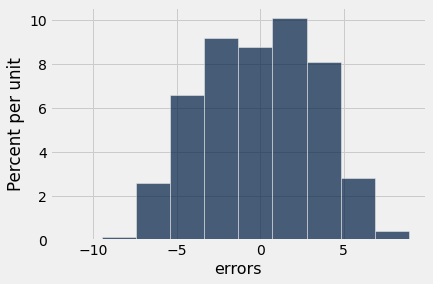

In [55]:
heights.hist('errors')

c:\users\admin\pycharmprojects\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


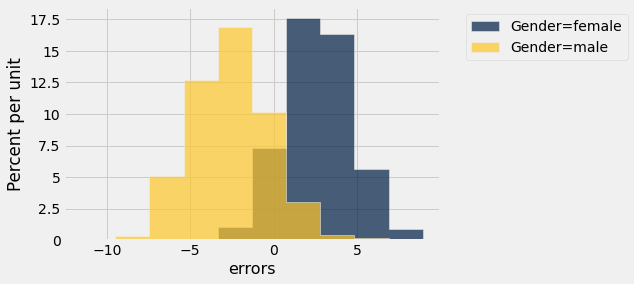

In [59]:
#group will take a column and mark a colour accordingly

heights.hist('errors', group='Gender')

In [66]:
def predict_smarter(h, g):
    nearby = heights.where('Parent Average', are.between(h-1/2, h+1/2))
    nearby_samegender = heights.where('Gender', g)
    nearby_mean = np.average(nearby_samegender.column('Child'))
    return nearby_mean

In [67]:
predict_smarter(68, 'female')

64.10397350993378

In [68]:
predict_smarter(68, 'male')

69.23409563409565

In [72]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Gender')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)
heights

Parent Average,Child,Gender,Prediction,errors,Smarter Prediction
72.75,73.2,male,70.1,-3.1,69.2341
72.75,69.2,female,70.1,0.9,64.104
72.75,69,female,70.1,1.1,64.104
72.75,69,female,70.1,1.1,64.104
71,73.5,male,70.4158,-3.08421,69.2341
71,72.5,male,70.4158,-2.08421,69.2341
71,65.5,female,70.4158,4.91579,64.104
71,65.5,female,70.4158,4.91579,64.104
69.5,71,male,68.5025,-2.4975,69.2341
69.5,68,female,68.5025,0.5025,64.104


In [74]:
smarter_pred_errs = heights.apply(difference, 'Smarter Prediction', 'Child')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)
heights

Parent Average,Child,Gender,Prediction,errors,Smarter Prediction,Smarter Errors
72.75,73.2,male,70.1,-3.1,69.2341,-3.9659
72.75,69.2,female,70.1,0.9,64.104,-5.09603
72.75,69,female,70.1,1.1,64.104,-4.89603
72.75,69,female,70.1,1.1,64.104,-4.89603
71,73.5,male,70.4158,-3.08421,69.2341,-4.2659
71,72.5,male,70.4158,-2.08421,69.2341,-3.2659
71,65.5,female,70.4158,4.91579,64.104,-1.39603
71,65.5,female,70.4158,4.91579,64.104,-1.39603
69.5,71,male,68.5025,-2.4975,69.2341,-1.7659
69.5,68,female,68.5025,0.5025,64.104,-3.89603


c:\users\admin\pycharmprojects\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


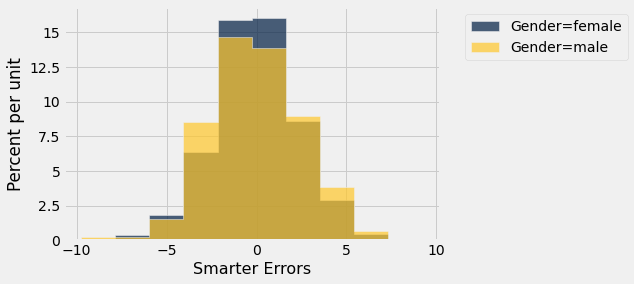

In [76]:
heights.hist('Smarter Errors', group='Gender')

In [77]:
#Break down the data into a bunch of categories

In [78]:

# group('Name of the Column')

# Optional second argument can be one of these
# group('Name of the Column', len) #Default
# group('Name of the Column', list)
# group('Name of the Column', sum)

In [81]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [85]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [86]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [87]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


In [88]:
cones.group('Flavor', np.average)

#Groupes them by flavor, computes the average for each group of Color & Price

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [90]:
survey = Table.read_table('welcome_survey_fa21.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep,Handedness,First pant leg,Sleep position
Second,8,5,6,Right-handed,Right leg in first,On your left side
Second,7,8,7.5,Right-handed,Right leg in first,On your left side
Second,6,7,7.5,Right-handed,Left leg in first,On your right side
Third,2,1,8,Right-handed,Right leg in first,On your back
Second,4,3,8,Right-handed,Left leg in first,On your stomach
First,5,4,8,Right-handed,Right leg in first,On your left side
First,6,3,7,Right-handed,Left leg in first,On your stomach
First,5,2,7,Right-handed,Right leg in first,On your back
Second,5,6,7,Right-handed,Right leg in first,On your back
First,4,12,8,Right-handed,Left leg in first,On your right side


In [91]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of textees average,Hours of sleep average,Handedness average,First pant leg average,Sleep position average
1,,3.31818,6.45455,,,
2,,4.41379,7.02586,,,
3,,5.02105,7.12105,,,
4,,5.59896,6.91667,,,
5,,5.91324,7.04224,,,
6,,6.79213,6.9382,,,
7,,6.98122,7.09859,,,
8,,8.56085,7.20635,,,
9,,9.7619,7.02381,,,
10,,15.4444,7.03704,,,


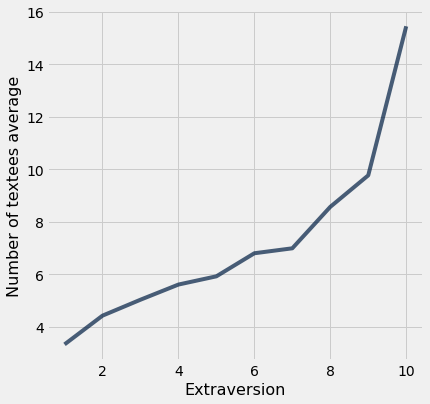

In [92]:
by_extra.select('Extraversion', 'Number of textees average').plot('Extraversion')

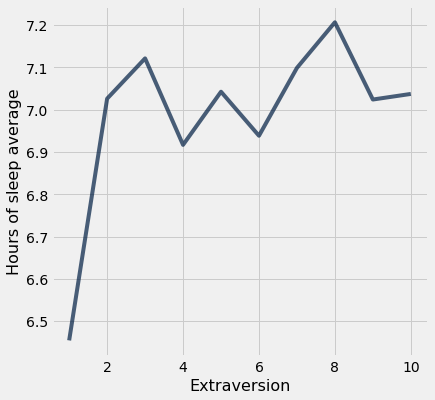

In [93]:
by_extra.select('Extraversion', 'Hours of sleep average').plot('Extraversion')

In [94]:
survey.group('Extraversion')
#Very few people have given their extraversion score as 1
#So it should not be implied that low extraversion score means less sleep

Extraversion,count
1,22
2,58
3,190
4,192
5,219
6,178
7,213
8,189
9,42
10,27
